<a href="https://colab.research.google.com/github/amltago/sales_prediction/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1- Part 2 (Core)

Submitted by: Aiza Marie Tago

## Loading Data

Mounting and loading the data from Google Drive

## Loading file from Google Drive and importing libraries

In [1]:
# Mounting drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing libraries and loading dataframe

In [2]:
# Importing libraries

import pandas as pd
import pandas as np

In [3]:
# Loading dataframe

filename = ("/content/drive/MyDrive/Coding Dojo/Files/sales_predictions.csv")
df = pd.read_csv(filename)

## Checking dataframe

In [4]:
# Checking headers

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Cleaning Data

In [5]:
# Identifying data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# 1) How many rows and columns?

# Running df.shape for rows and columns checking

df.shape
print( 'Rows and Columns', (df.shape))

Rows and Columns (8523, 12)


In [7]:
# 2) What are the datatypes of each variable?

# Checking for data types

df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
# Checking and dropping duplicates

df.duplicated().sum()
print("Duplicates", (df.duplicated().sum()))

Duplicates 0


**There are no duplicates in the dataset**

In [9]:
# Checking null or nan

df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# Checking Item_Weight column

no_weight = df['Item_Weight'].isna()
df.loc[no_weight, :]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [11]:
# Dropping columns with NAN values as they are not necessary

df.drop(columns= 'Item_Weight', inplace = True)
df.drop(columns= 'Outlet_Size', inplace = True)

**Dropping both columns, although each column are having large numbers, I believe they have minimal to no effect in sales prediction or calculating income**

## Dataframe after dropping columns with NAN/null values

In [12]:
# Checking dataframe after dropping columns

df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [13]:
# Checking data information after dropping columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


## Checking for inconsistencies

In [14]:
# Checking for inconsistencies

# Get column names
column_names = df.columns

# Iterate each column
for columns in column_names:
    print(columns,df[columns].unique())


Item_Identifier ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Visibility [0.0160473  0.01927822 0.01676007 ... 0.03518627 0.14522065 0.04487828]
Item_Type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Item_MRP [249.8092  48.2692 141.618  ...  57.5904 214.5218  75.467 ]
Outlet_Identifier ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Establishment_Year [1999 2009 1998 1987 1985 2002 2007 1997 2004]
Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Item_Outlet_Sales [3735.138   443.4228 2097.27   ... 7182.6504 3608.636  2778.3834]


In [15]:
# Checking for inconsistencies for categorical data

df_cat = df.select_dtypes(include=['object'])

cat_names = df_cat.columns

# Iterate each column

for columns in cat_names:
    print(columns,df[columns].unique())

Item_Identifier ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [16]:
# Checking for inconsistencies for numerical data

df_num = df.select_dtypes(include=['int64','float64'])

num_names = df_num.columns

# Iterate each column

for columns in num_names:
    print(columns,df[columns].unique())

Item_Visibility [0.0160473  0.01927822 0.01676007 ... 0.03518627 0.14522065 0.04487828]
Item_MRP [249.8092  48.2692 141.618  ...  57.5904 214.5218  75.467 ]
Outlet_Establishment_Year [1999 2009 1998 1987 1985 2002 2007 1997 2004]
Item_Outlet_Sales [3735.138   443.4228 2097.27   ... 7182.6504 3608.636  2778.3834]


## Validating content of categorical columns

In [17]:
# Checking for value counts

ID = df['Item_Identifier']
ID.value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [18]:
len(ID)

8523

In [19]:
#Checking integrity of  entries

FDW = ID == 'FDW13'
FDW.value_counts()

False    8513
True       10
Name: Item_Identifier, dtype: int64

In [20]:
#Checking integrity of  entries

DR = ID == 'DRC01'
DR.value_counts()

False    8517
True        6
Name: Item_Identifier, dtype: int64

**The entries that are showing unique are identifiers of the items**

In [21]:
# Filtering Item_Fat_Content column

IFC = df['Item_Fat_Content']
IFC.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [22]:
# Changing low fat and LF to Low Fat

df.loc[df['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
df.loc[df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'

# Changing reg to Regular

df.loc[df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'

In [23]:
# Checking dataframe after changing variables (refer to above cell)

cat_names

# Iterate each column

for columns in cat_names:
    print(columns,df[columns].unique())

Item_Identifier ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content ['Low Fat' 'Regular']
Item_Type ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Location_Type ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [24]:
# Checking for Item_Fat_Content column for value counts

IFC.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [25]:
# Checking for Item_Type column for value counts

I_Type= df['Item_Type']
I_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [26]:
# Renaming Item Type

df.loc[df['Item_Type'] == 'Fruits and Vegetables', 'Item_Type'] = 'F&V'
df.loc[df['Item_Type'] == 'Snack Foods', 'Item_Type'] = 'SF'
df.loc[df['Item_Type'] == 'Household', 'Item_Type'] = 'HH'
df.loc[df['Item_Type'] == 'Frozen Foods', 'Item_Type'] = 'FF'
df.loc[df['Item_Type'] == 'Baking Goods', 'Item_Type'] = 'BG'
df.loc[df['Item_Type'] == 'Health and Hygiene', 'Item_Type'] = 'H&H'
df.loc[df['Item_Type'] == 'Soft Drinks', 'Item_Type'] = 'SD'
df.loc[df['Item_Type'] == 'Hard Drinks', 'Item_Type'] = 'HD'
df.loc[df['Item_Type'] == 'Starchy Foods', 'Item_Type'] = 'SFoods'
df.loc[df['Item_Type'] == 'Breakfast', 'Item_Type'] = 'Bfast'
df.loc[df['Item_Type'] == 'Seafood', 'Item_Type'] = 'SFood'


In [27]:
# Checking for Item_Fat_Content column for value counts

O_ID = df['Outlet_Identifier']
O_ID.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [28]:
# Checking for Outlet_Type column for value counts

OType= df['Outlet_Type']
OType.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

**The categorical columns have identifiers for items for this reason it would filter unique entries. Has checked the validity of the data per column. Updated the Item_Fat_Content the variables low fat and LF to Low Fat, and reg to Regular for uniformity**

## Validating content of numerical columns

In [29]:
#import statistics

import statistics

In [30]:
# Filtering Item_Visibility

item_vis = df['Item_Visibility']

ave_item_vis = statistics.mean(item_vis)

print("The visibility is " + str (round(ave_item_vis, 2)))
print("Min",item_vis.min())
print("Max",item_vis.max())

The visibility is 0.07
Min 0.0
Max 0.328390948


In [31]:
# Filtering Item_MRP

MRP = df['Item_MRP']

ave_MRP = statistics.mean(MRP)

print("The average MRP is " + str (round(ave_MRP, 2)))
print("Min",MRP.min())
print("Mticax",MRP.max())

The average MRP is 140.99
Min 31.29
Mticax 266.8884


In [32]:
# Filtering and sorting Outlet_Establishment_Year

established_year = df['Outlet_Establishment_Year']
established_year.value_counts()
sort_per_year = established_year.value_counts()
sort_per_year.sort_values()

1998     555
2007     926
2009     928
2002     929
1999     930
1997     930
2004     930
1987     932
1985    1463
Name: Outlet_Establishment_Year, dtype: int64

In [33]:
# Filtering and checking min, max and mean for sales column

sales = df['Item_Outlet_Sales']

average = statistics.mean(sales)

print("The average sales is $" + str(round(average, 2)))
print("Min",sales.min())
print("Max",sales.max())

The average sales is $2181.29
Min 33.29
Max 13086.9648


**Showed the min and max of each columns except for Outlet_Establishment_Year, instead I sorted the values.**

# Project 1 - Part 3 (Core)

## Histogram to view the distributions of various features in dataset


In [34]:
# Importing libraries

import matplotlib.pyplot as plt
import seaborn as sns

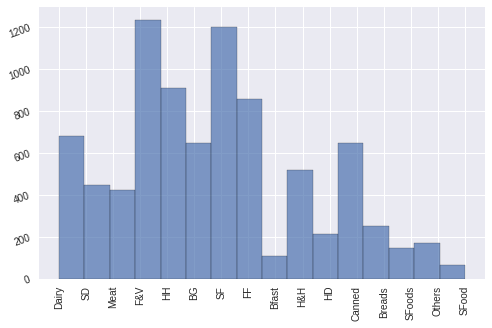

In [35]:
# Creating histogram for Item Identifier

plt.style.use('seaborn')
plt.figure(figsize=(8,5))
plt.hist(I_Type, bins=16, alpha=0.7, edgecolor='black', label='Item Type')

plt.xticks(rotation= 90)
plt.yticks(rotation= 20);

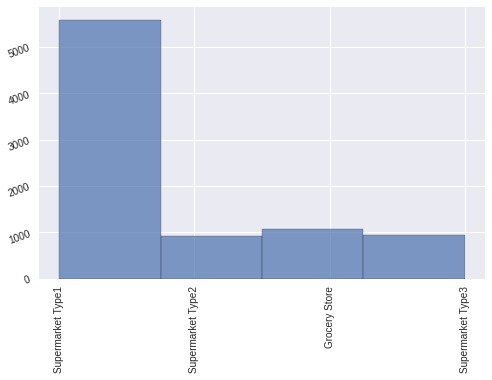

In [36]:
# Creating histogram for Outlet Type

plt.style.use('seaborn')
plt.figure(figsize=(8,5))
plt.hist(OType, bins=4, alpha=0.7, edgecolor='black', label='Outlet Type')

plt.xticks(rotation= 90)
plt.yticks(rotation= 20);


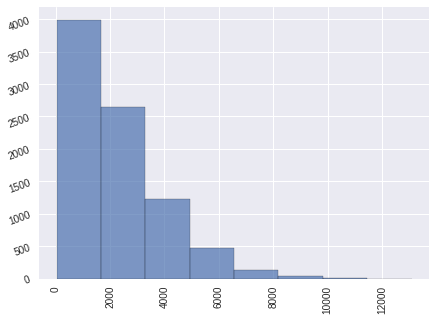

In [37]:
# Creating histogram for Sales

plt.style.use('seaborn')
plt.figure(figsize=(7,5))
plt.hist(sales, bins=8, alpha=0.7, edgecolor='black', label='Sales')

plt.xticks(rotation= 90)
plt.yticks(rotation= 20);

## Boxplot to view statistical summaries of various features in dataset

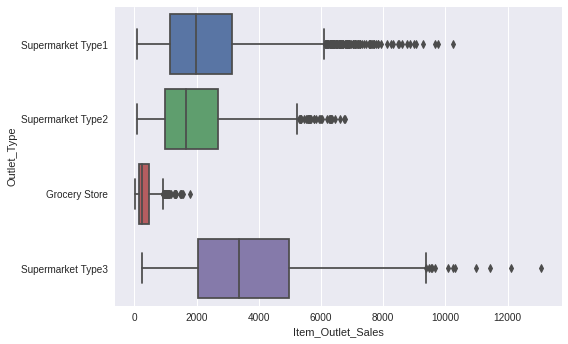

In [38]:
# Creating boxplot for Item Outlet Sales and the Type of Outlet

sns.boxplot(x='Item_Outlet_Sales', y='Outlet_Type', data=df);

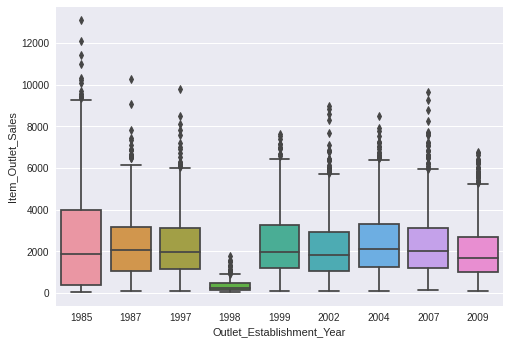

In [39]:
# Boxplot for Item Outlet Sales and the year the outlet was established

sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df);

## Heatmap of the correlation between features

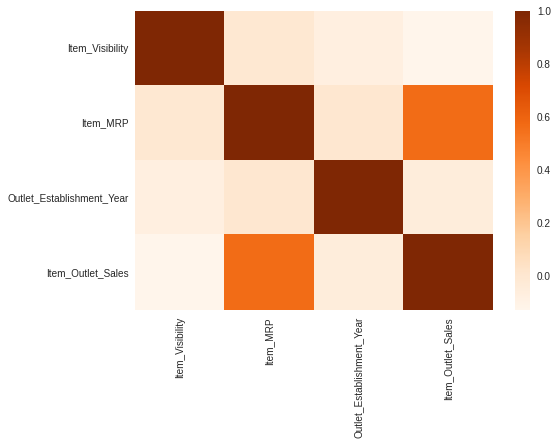

In [40]:
# Creating correlation

corr = df.corr()

sns.heatmap(corr, cmap = 'Oranges');

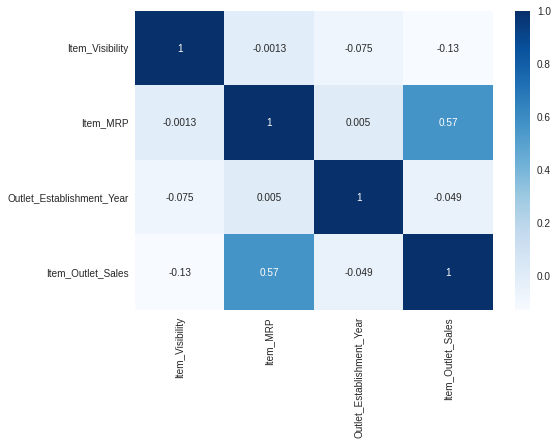

In [41]:
# Creating correlation annot= True

sns.heatmap(corr, cmap = 'Blues', annot = True);